In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

import datetime
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from matplotlib.animation import ArtistAnimation

plt.style.use('default')

CONFIRMED_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATH_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED_CASES_TIME_SERIES_CSV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# needed to know the latest column in the timeseries
first_date = datetime.date(2020, 1, 22)
yesterday = (datetime.datetime.today() - datetime.timedelta(days=1)).date()
latest_column_name = yesterday.strftime('%-m/%-d/%y')


In [61]:
confirmed_cases_timeseries = pd.read_csv(CONFIRMED_CASES_TIME_SERIES_CSV)
death_cases_timeseries = pd.read_csv(DEATH_CASES_TIME_SERIES_CSV)
recovered_cases_timeseries = pd.read_csv(RECOVERED_CASES_TIME_SERIES_CSV)

confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] != 'Diamondd Princess'].
death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Country/Region'] != 'Diamondd Princess']
recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Country/Region'] != 'Diamondd Princess']

# confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Lat'] != 0]
# death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Lat'] != 0]
# recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Lat'] != 0]

# confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Long'] != 0]
# death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Long'] != 0]
# recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Long'] != 0]

# recovered_cases_timeseries[recovered_cases_timeseries['Long'] == 0]

In [62]:
all_countries_confirmed_cases_timeseries = confirmed_cases_timeseries.sum()
all_countries_death_cases_timeseries = death_cases_timeseries.sum()
all_countries_recovered_cases_timeseries = recovered_cases_timeseries.sum()

all_countries_confirmed_cases_timeseries

Lat          5545.835183
Long         6085.343656
1/22/20       555.000000
1/23/20       654.000000
1/24/20       941.000000
               ...      
3/23/20    378235.000000
3/24/20    418045.000000
3/25/20    467653.000000
3/26/20    529591.000000
3/27/20    593291.000000
Length: 68, dtype: float64

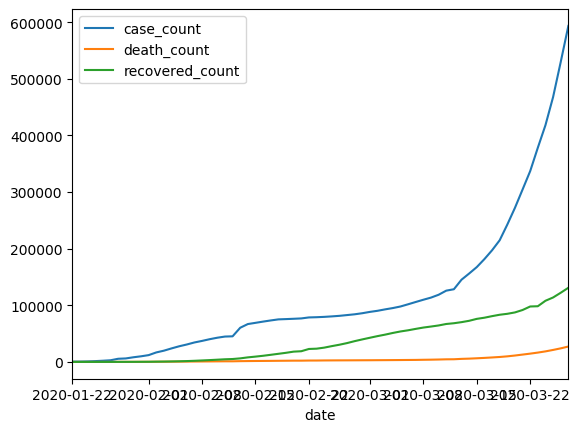

In [63]:
def plot_cases_timeseries(confirmed_series, death_series, recovered_series, start_date=None):
    start_date = start_date or first_date
    day_count = (yesterday - start_date).days + 1
    
    timeseries = []

    for date_obj in (start_date + datetime.timedelta(n) for n in range(day_count)):
        column_name = date_obj.strftime('%-m/%-d/%y')

        timeseries += [{
            'date': date_obj,
            'case_count': confirmed_series[column_name],
            'death_count': death_series[column_name],
            'recovered_count': recovered_series[column_name],
        }]

    timeseries_df = pd.DataFrame(timeseries, columns=['date', 'case_count', 'death_count', 'recovered_count'])
    timeseries_df = timeseries_df.set_index('date')

    timeseries_df.plot()

plot_cases_timeseries(
    all_countries_confirmed_cases_timeseries,
    all_countries_death_cases_timeseries,
    all_countries_recovered_cases_timeseries,
)

In [64]:
us_confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] == 'US'].sum()
us_death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Country/Region'] == 'US'].sum()
us_recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Country/Region'] == 'US'].sum()

it_confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Country/Region'] == 'Italy'].sum()
it_death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Country/Region'] == 'Italy'].sum()
it_recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Country/Region'] == 'Italy'].sum()

ny_confirmed_cases_timeseries = confirmed_cases_timeseries[confirmed_cases_timeseries['Province/State'] == 'New York County, NY'].sum()
ny_death_cases_timeseries = death_cases_timeseries[death_cases_timeseries['Province/State'] == 'New York County, NY'].sum()
ny_recovered_cases_timeseries = recovered_cases_timeseries[recovered_cases_timeseries['Province/State'] == 'New York County, NY'].sum()

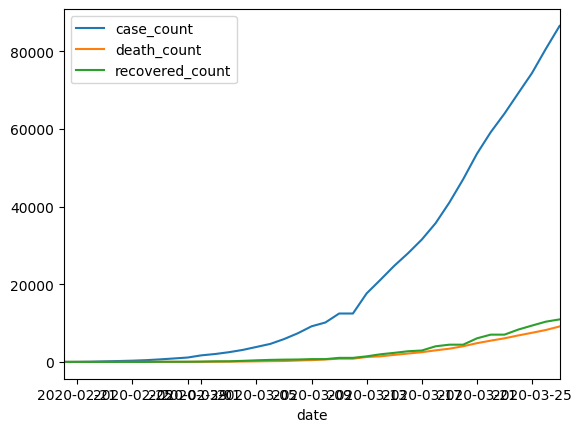

In [65]:
plot_cases_timeseries(
    it_confirmed_cases_timeseries,
    it_death_cases_timeseries,
    it_recovered_cases_timeseries,
    start_date=datetime.date(2020, 2, 20),
)

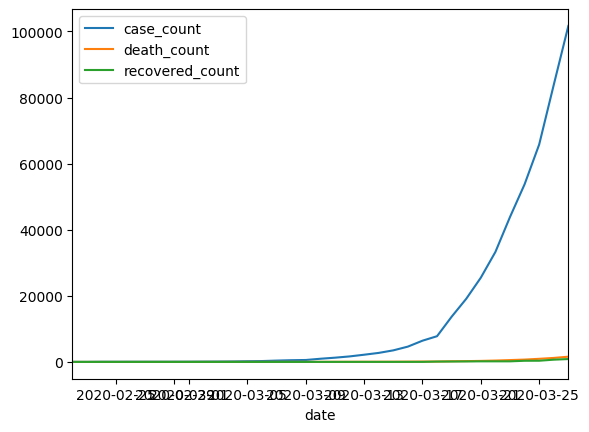

In [66]:
plot_cases_timeseries(
    us_confirmed_cases_timeseries,
    us_death_cases_timeseries,
    us_recovered_cases_timeseries,
    start_date=datetime.date(2020, 2, 22),
)

In [67]:
gdf_confirmed = gpd.GeoDataFrame(
    confirmed_cases_timeseries,
    geometry=gpd.points_from_xy(
        confirmed_cases_timeseries['Long'],
        confirmed_cases_timeseries['Lat'],
))
gdf_deaths = gpd.GeoDataFrame(
    death_cases_timeseries,
    geometry=gpd.points_from_xy(
        death_cases_timeseries['Long'],
        death_cases_timeseries['Lat'],
))
gdf_recovered = gpd.GeoDataFrame(
    recovered_cases_timeseries,
    geometry=gpd.points_from_xy(
        recovered_cases_timeseries['Long'],
        recovered_cases_timeseries['Lat'],
))

3/27/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1600x900 with 0 Axes>

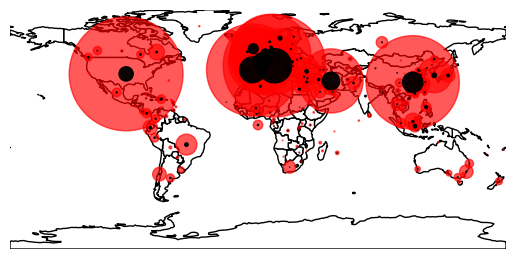

In [68]:
fig = plt.figure(figsize=(16, 9))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')
ax.set_axis_off()
ax.margins(0)
ax.apply_aspect()

print(latest_column_name)

gdf_confirmed.plot(ax=ax, marker='o', color='red', alpha=0.65, markersize=((gdf_confirmed[latest_column_name] - gdf_recovered[latest_column_name]) / 15))
gdf_deaths.plot(ax=ax, marker='o', color='black', alpha=0.95, markersize=(gdf_deaths[latest_column_name] / 15))

plt.show()


1/22/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

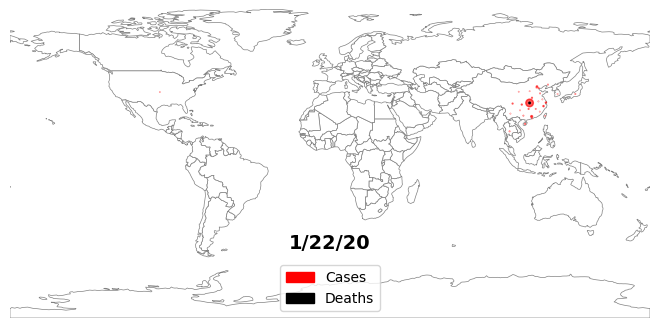

1/23/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

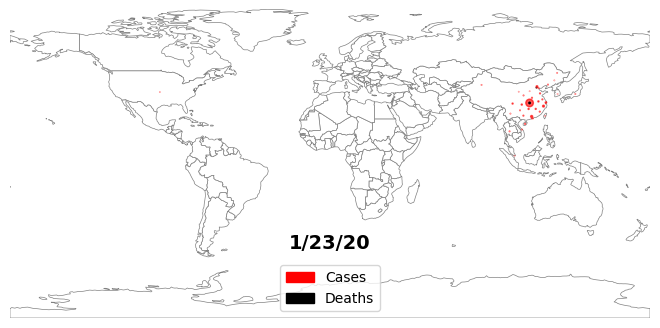

1/24/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

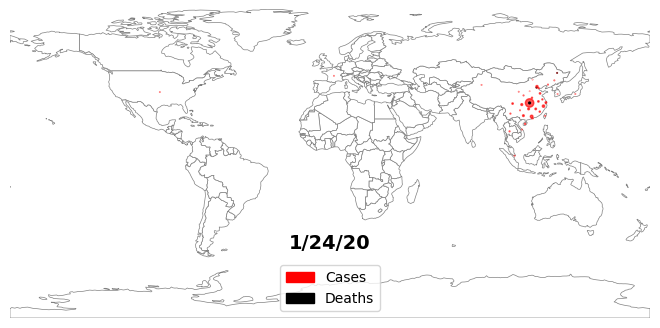

1/25/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

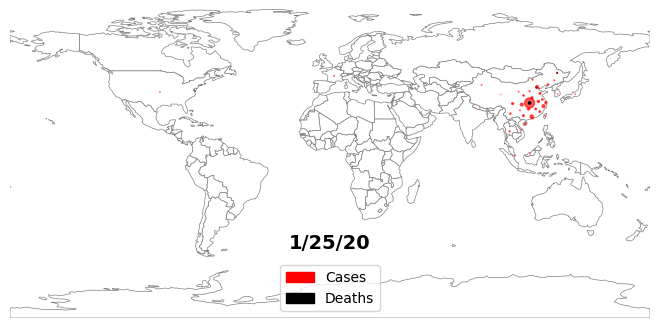

1/26/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

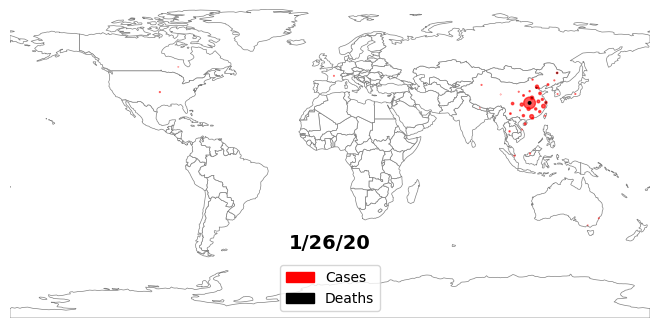

1/27/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

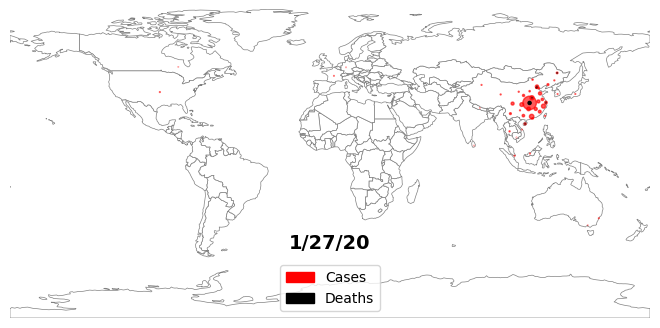

1/28/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

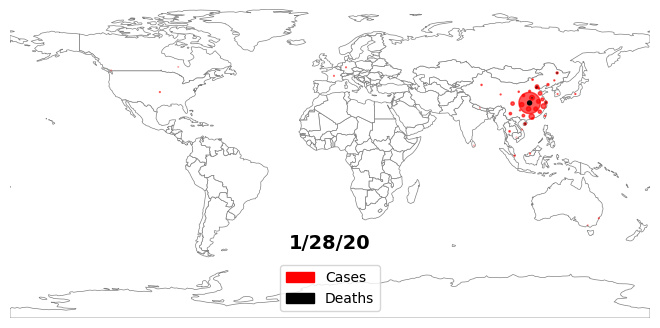

1/29/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

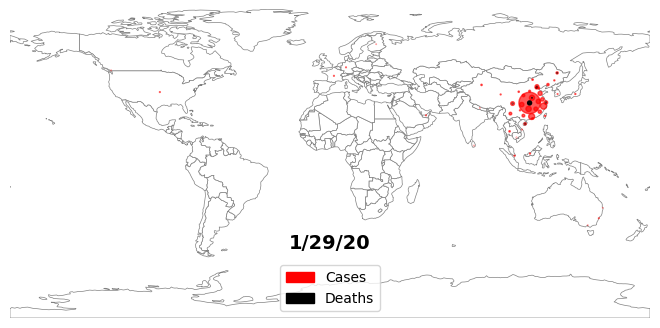

1/30/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

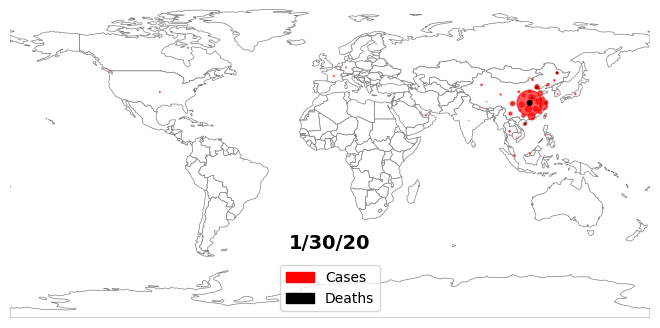

1/31/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

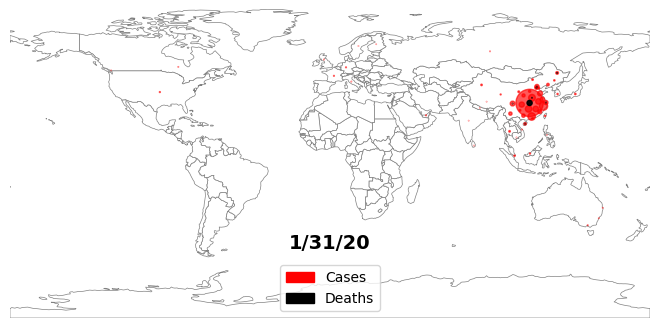

2/1/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

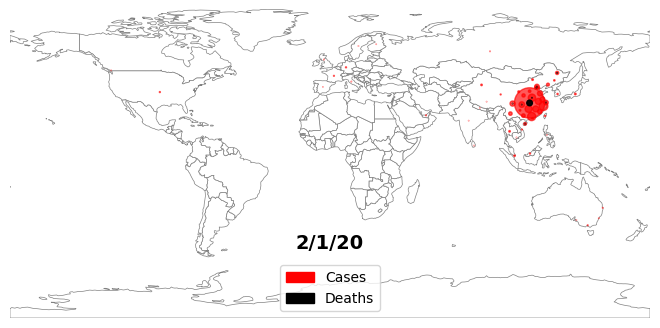

2/2/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

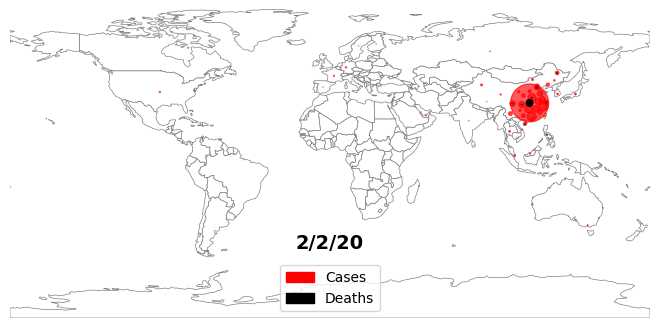

2/3/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

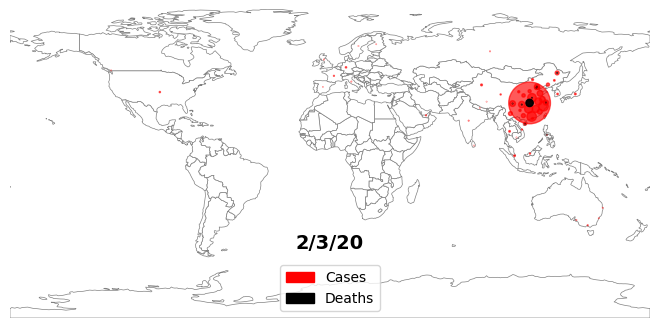

2/4/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

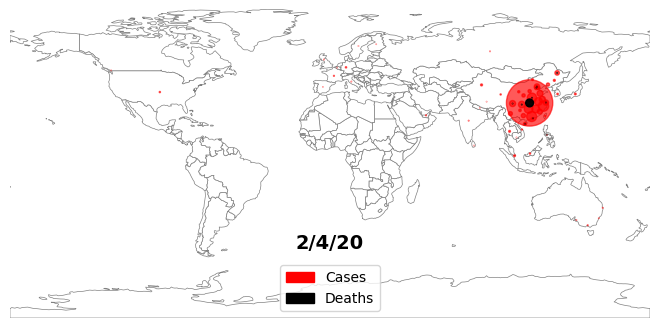

2/5/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

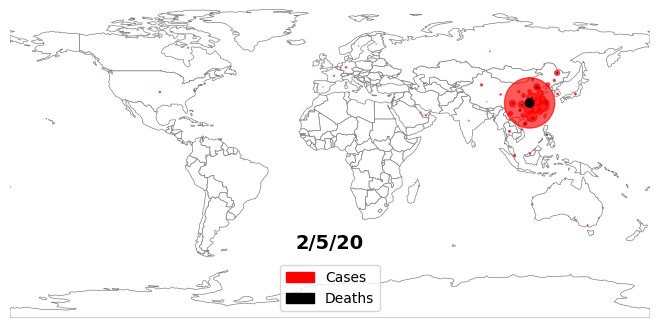

2/6/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

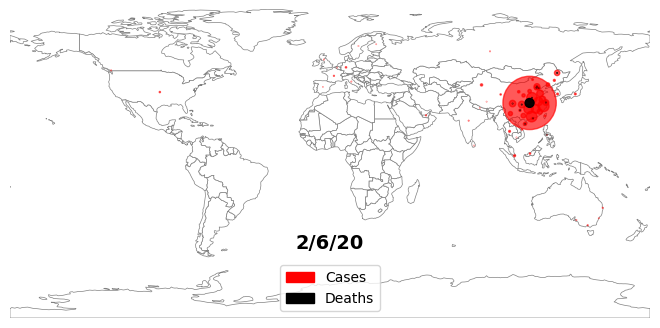

2/7/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

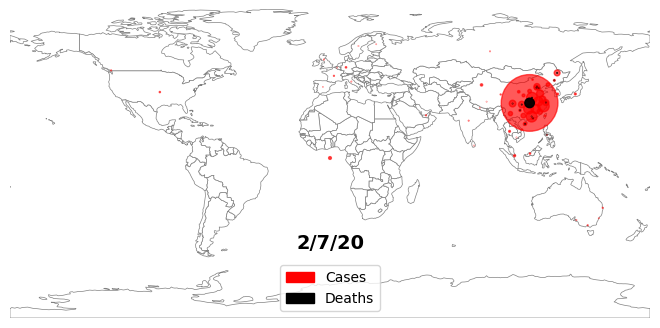

2/8/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

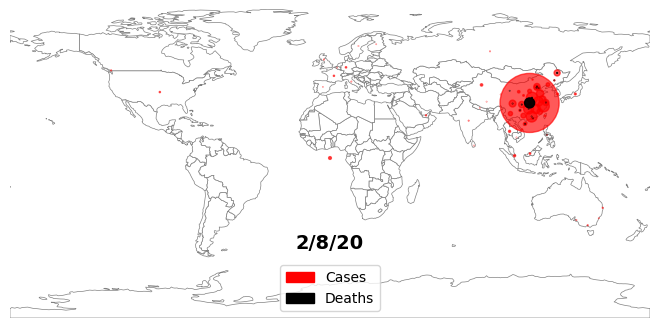

2/9/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

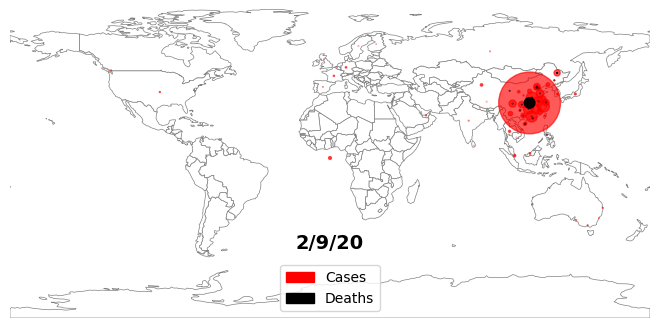

2/10/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

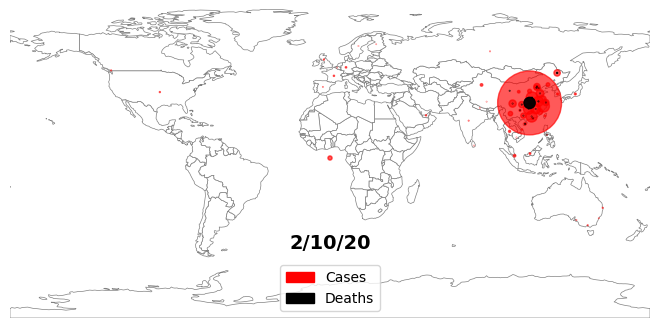

2/11/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

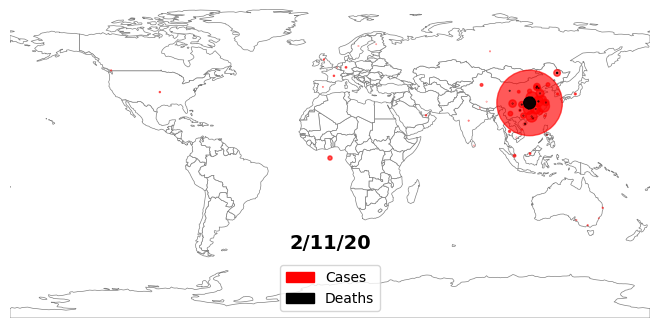

2/12/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

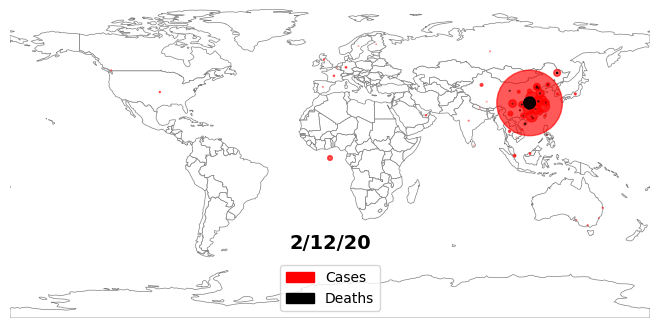

2/13/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

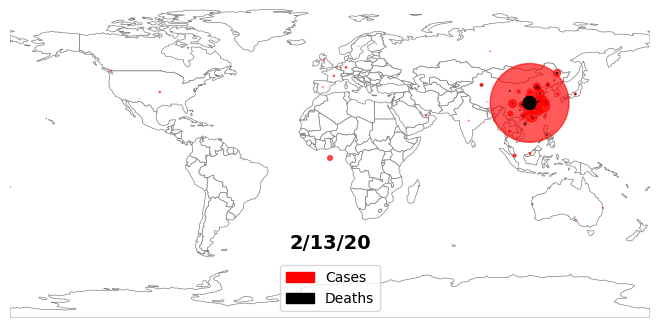

2/14/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

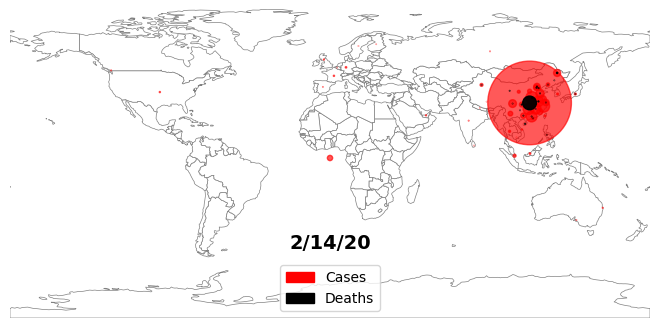

2/15/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

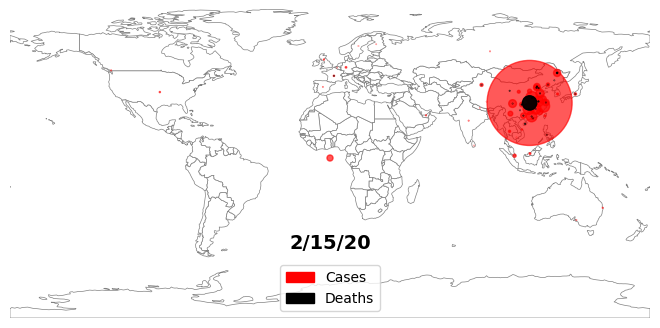

2/16/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

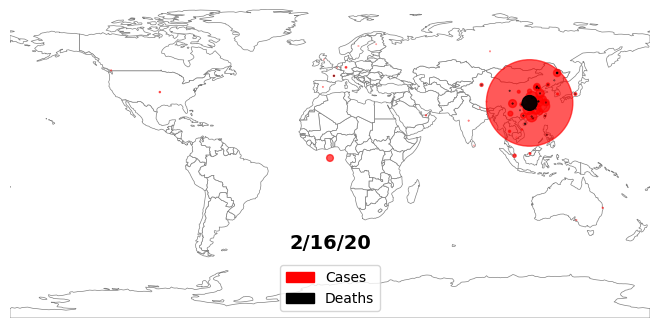

2/17/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

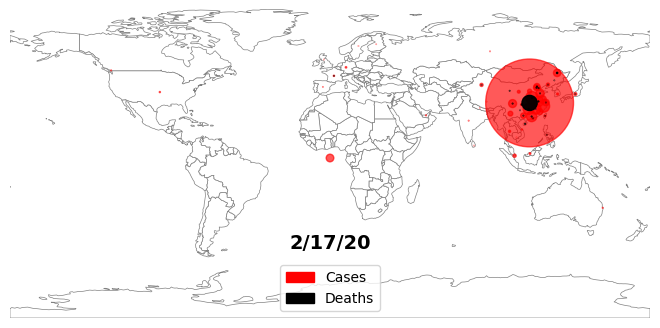

2/18/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

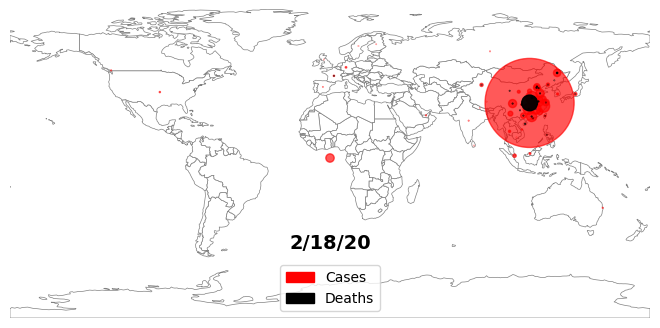

2/19/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

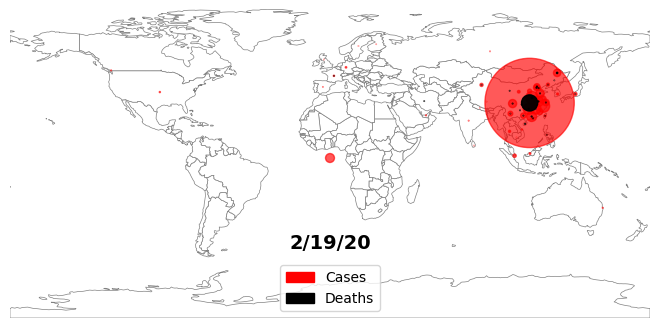

2/20/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

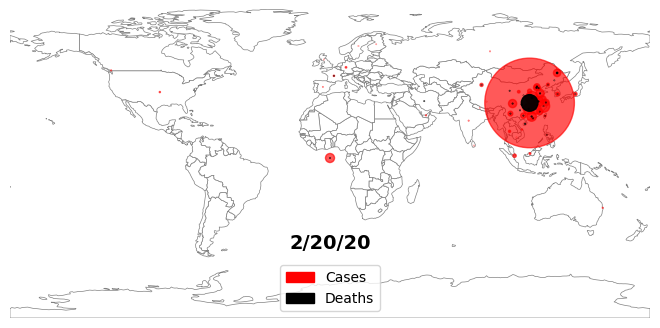

2/21/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

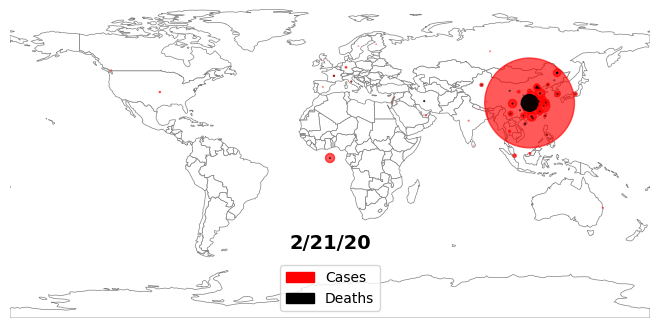

2/22/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

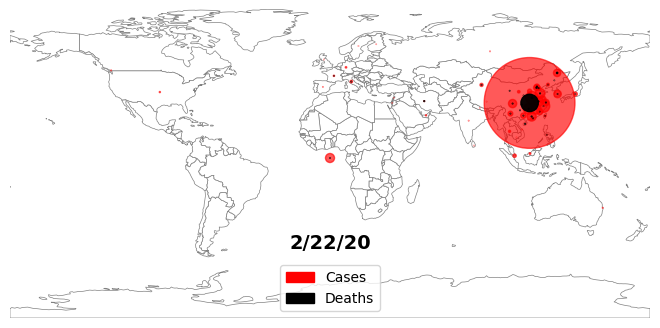

2/23/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

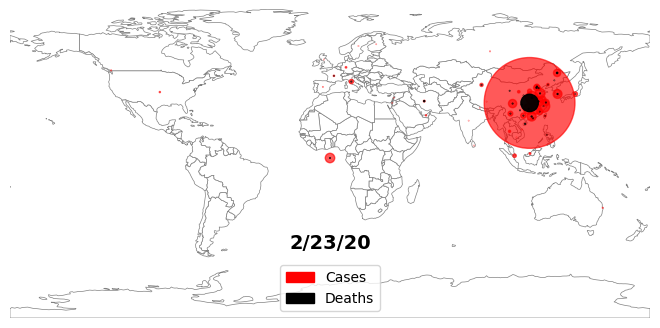

2/24/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

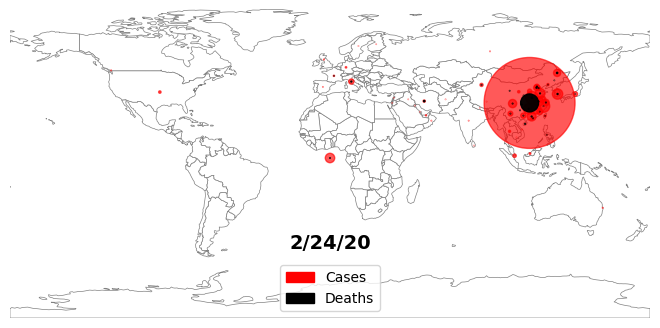

2/25/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

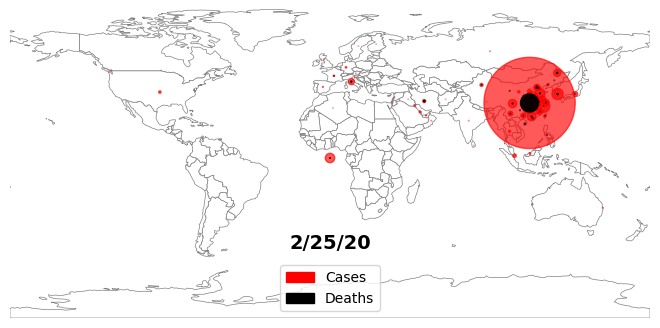

2/26/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

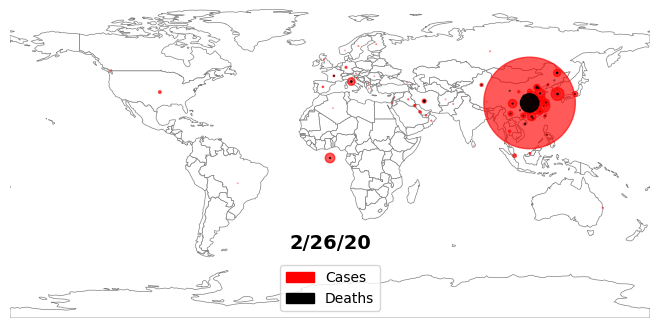

2/27/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

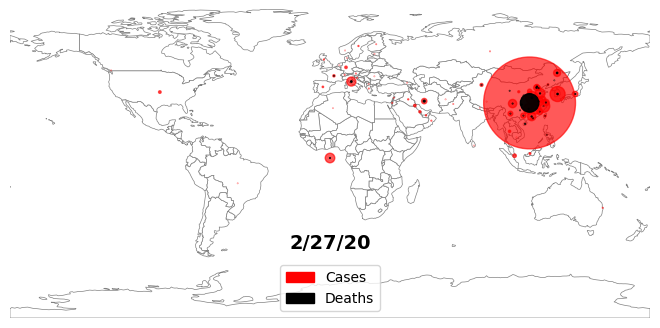

2/28/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

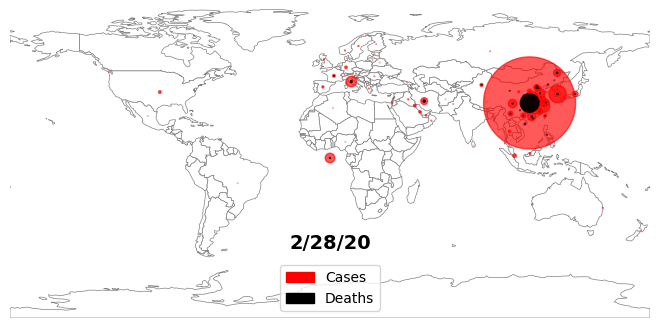

2/29/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

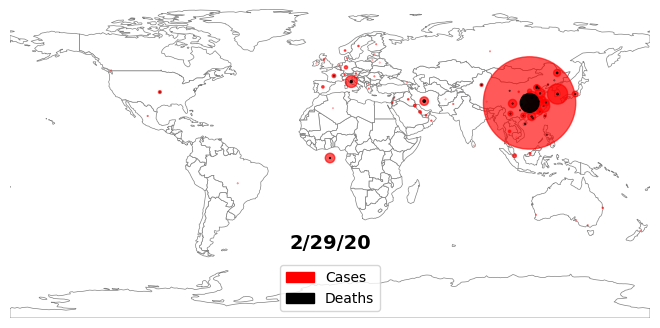

3/1/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

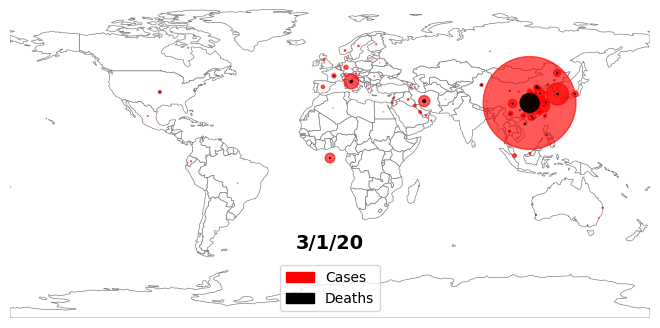

3/2/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

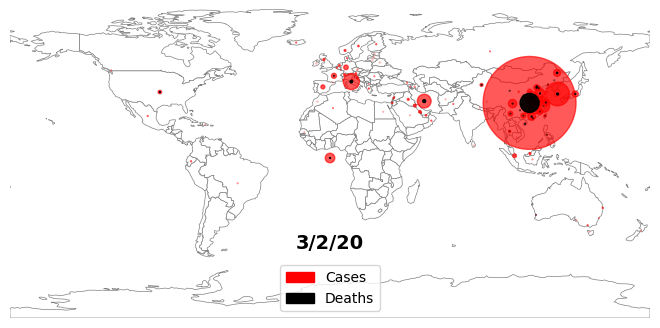

3/3/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

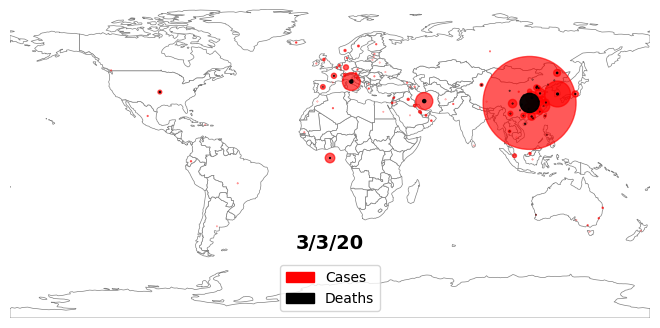

3/4/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

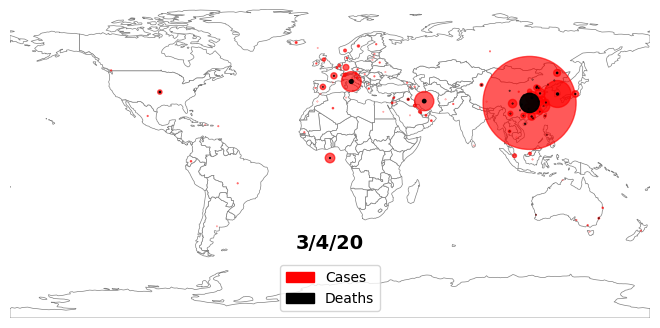

3/5/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

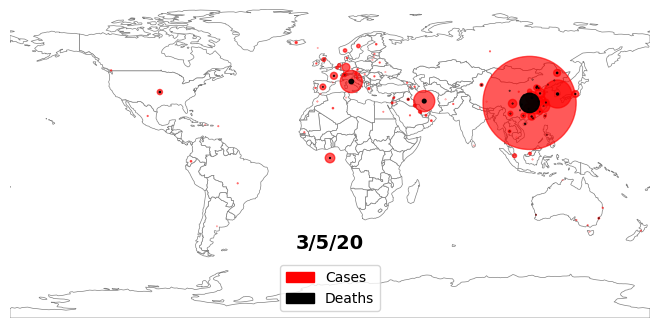

3/6/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

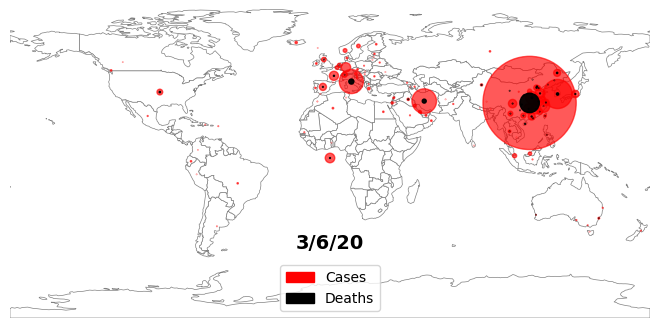

3/7/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

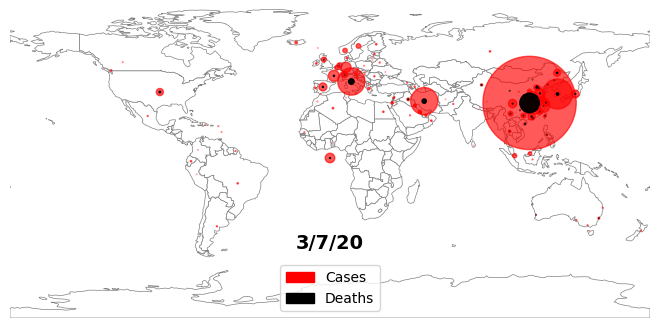

3/8/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

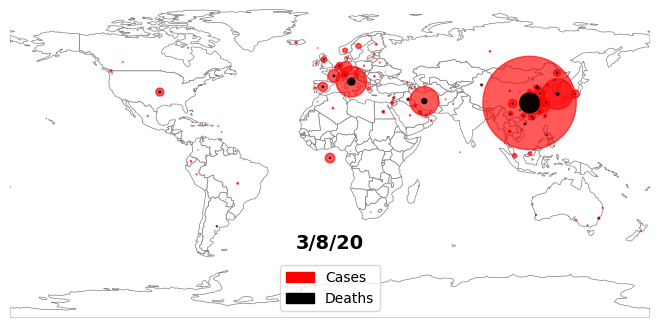

3/9/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

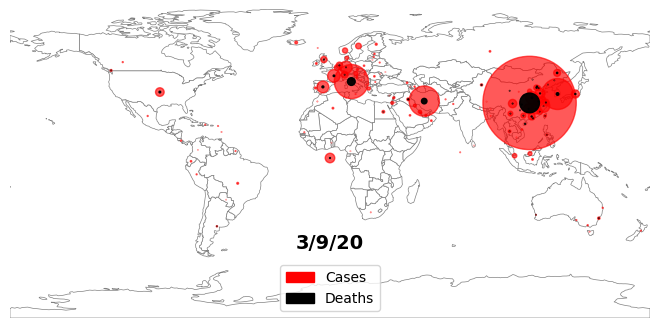

3/10/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

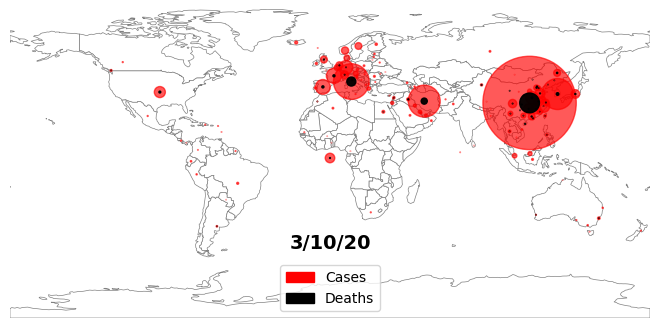

3/11/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

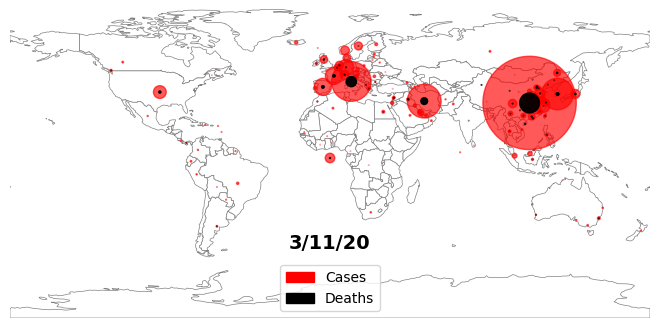

3/12/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

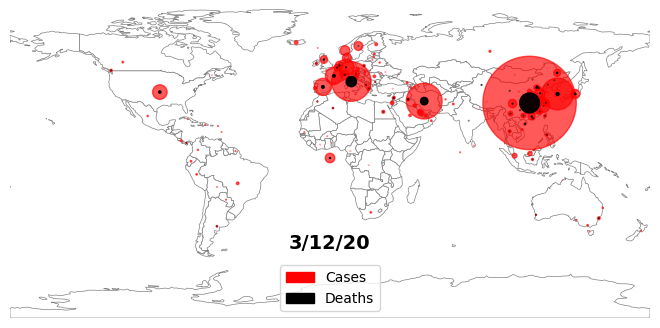

3/13/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

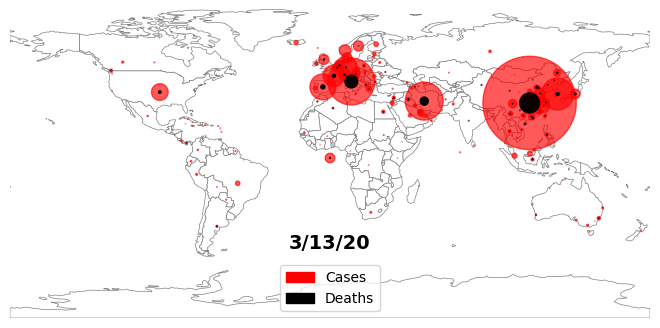

3/14/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

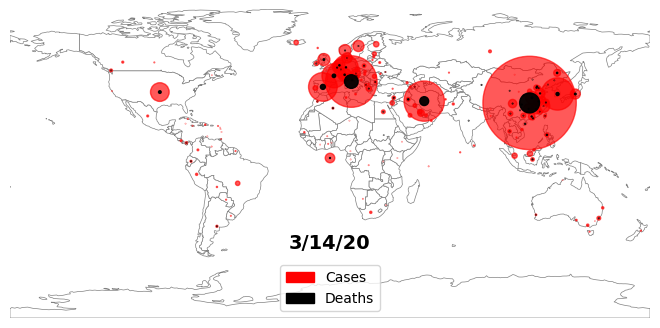

3/15/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

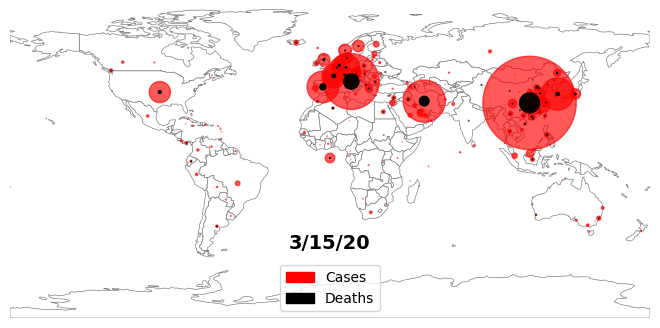

3/16/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

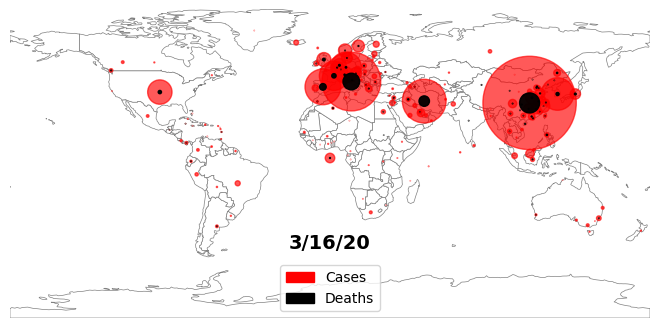

3/17/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

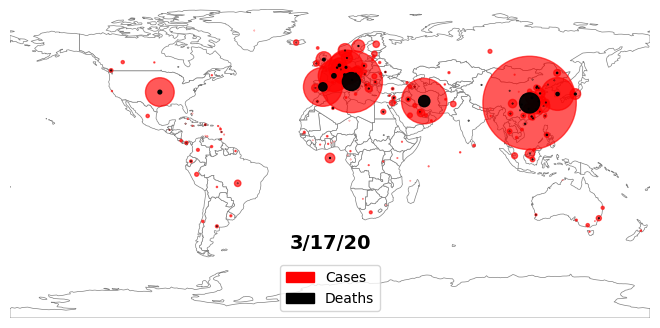

3/18/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

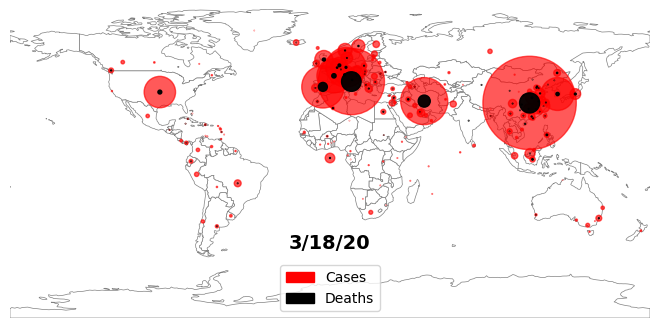

3/19/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

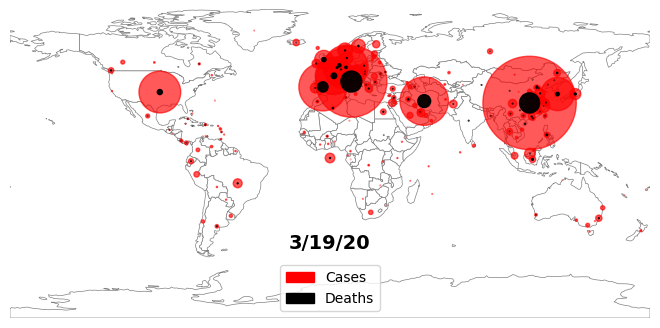

3/20/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

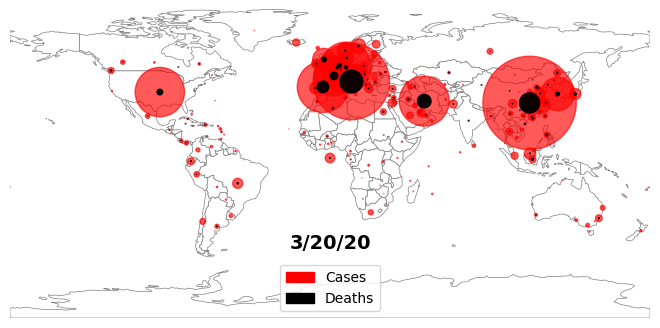

3/21/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

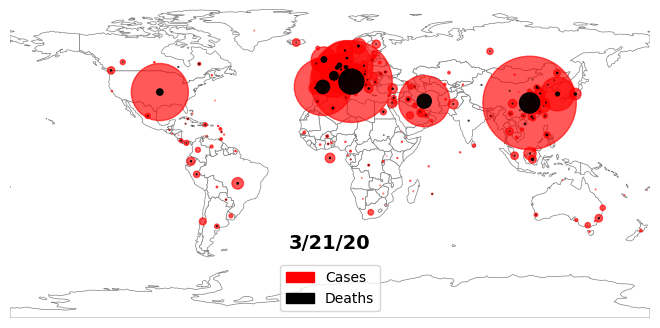

3/22/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

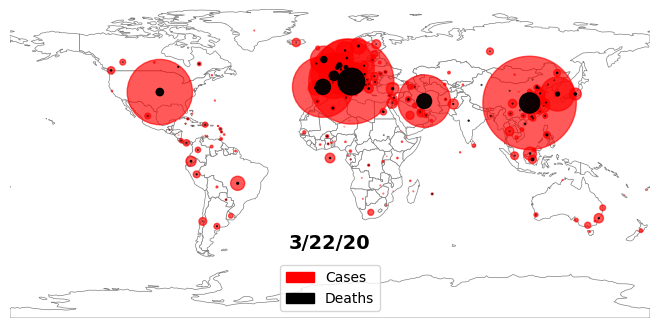

3/23/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

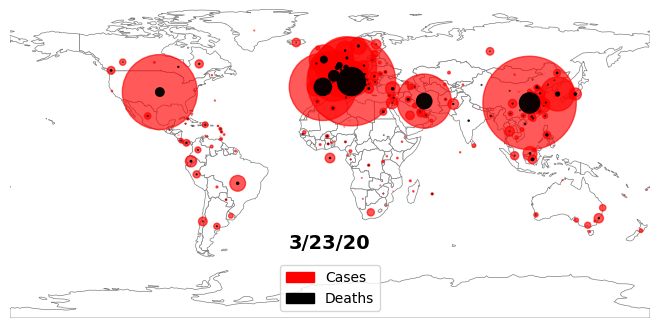

3/24/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

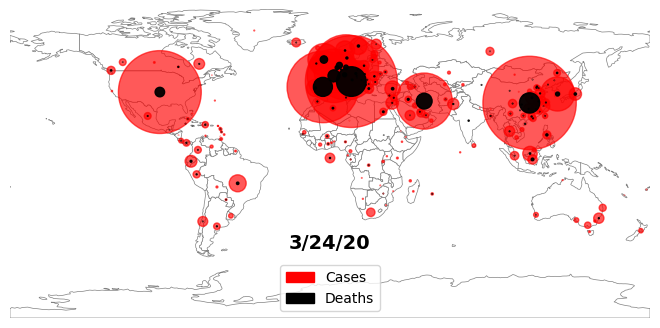

3/25/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

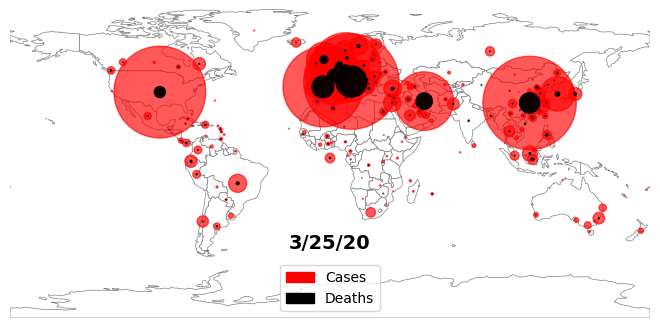

3/26/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

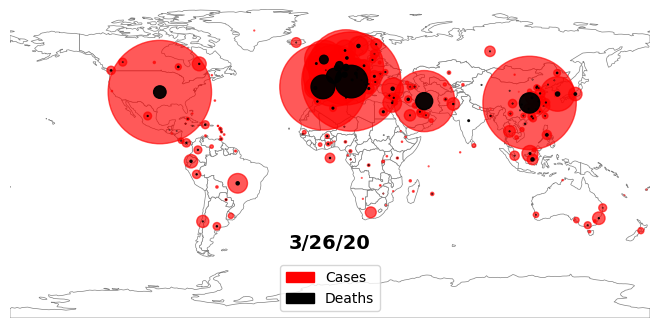

3/27/20


/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/steve/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

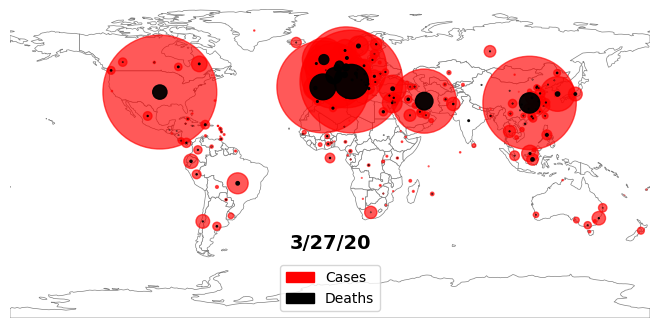

In [15]:
import io
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.patches as mpatches

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cases_patch = mpatches.Patch(color='red', label='Cases')
deaths_patch = mpatches.Patch(color='black', label='Deaths')

day_count = (yesterday - first_date).days + 1
for i, series_date in enumerate(first_date + datetime.timedelta(n) for n in range(day_count)):
    plt.clf()
    fig = plt.figure(figsize=(16, 9))
    
    ax = world.plot(color='white', edgecolor='grey', linewidths=0.5)
    ax.set_axis_off()
    ax.margins(0)
    ax.apply_aspect()
    
    column_name = series_date.strftime('%-m/%-d/%y')
    plt.text(0.5, 0.275, column_name, horizontalalignment='center', fontweight=600, verticalalignment='top', fontsize=14, transform = ax.transAxes)
    print(column_name)
    
    gdf_confirmed.plot(ax=ax, marker='o', color='red', alpha=0.65, markersize=((gdf_confirmed[column_name] - gdf_recovered[column_name]) / 15))
    gdf_deaths.plot(ax=ax, marker='o', color='black', alpha=0.95, markersize=(gdf_deaths[column_name] / 15)).figure
    
    filename = '/Users/steve/Desktop/corona_world/{}.png'.format(i)
    
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.legend(loc='lower center', handles=[cases_patch, deaths_patch])
    plt.savefig(filename, format='png', bbox_inches = 'tight', pad_inches = 0, dpi=600)
    plt.show()

# make a video:
# ffmpeg -r 8 -f image2 -s 1920x1080 -i ~/Desktop/corona_world/%d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p test.mp4
